In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels

## Question 1
阿茲罕默症 (Alzheimer's Disease)為老年人常見疾病。目前台灣老年人口中，年紀滿65歲但未達75歲者有1457.2千人，滿75歲但未達85歲者有1093千人。年紀滿85歲者有761.8千人。為了瞭解各年齡層患阿茲罕默症之比率與總數，衛生單位進行了一個調查。調查的方法為針對三個老年的年齡層，\[65, 75)、\[75, 85)、 [85,$\infty$)，各自隨機抽樣，並查詢被抽到的個體是否患有阿茲罕默症。調查結果在ds_a.xls。其中年紀的編碼(Age category)為 1 = \[65, 75), 2 = \[75, 85), 3 = [85,$\infty$)。而阿茲罕默症的編碼為 1 = no, 2 = yes。
* (3\%) A: 年紀滿65歲但未達75歲者患阿茲罕默症的比率以及95\% Confidence Interval。
* (3\%) D: 估計年紀滿65歲但未達75歲者患阿茲罕默症的總數之均數以及95\% Confidence Interval。
* (5\%) G: 估計年滿65歲者患阿茲罕默症的總數之均數以及95\% Confidence Interval。提示: 直接將前三題的Confidence Interval上、下邊界各自相加會得到錯誤的結果。

In [70]:
q1_df1 = pd.read_excel('ds_a.xlsx')
tmp1 = q1_df1.value_counts()
tmp1 = tmp1.reset_index()
print(df1.tail())
q1_df1.isna().sum()

      Alzheimers  Age category
1549           1             1
1550           1             3
1551           1             1
1552           1             2
1553           1             2


Alzheimers      0
Age category    0
dtype: int64

In [71]:
# unit: thousand persons
age_population =[1457.2, 1093, 761.8]
alpha = 0.05
# total
total_mean = []
total_var = []
for i, age in enumerate([1, 2, 3]):
    q1_tmpindex = q1_df1['Age category'] == age
    q1_alz = q1_df1[q1_tmpindex]['Alzheimers'] == 2
    az_prob = q1_alz.mean()
    age_n = q1_alz.shape[0]
    print(f"---\naz_prob = {az_prob:.4f}, age_n = {age_n}")
    np = age_n * az_prob
    n1p = age_n * (1 - az_prob)
    print(f" NP = {np:.4f}, N(1-P) = {n1p:.4f}") #看有沒有合格
    
    zcv=stats.norm.ppf(1-alpha/2)
    print(f"z critical value = {zcv:.4f}")
    phead_sd = (az_prob * (1 - az_prob) / age_n) ** 0.5 #sample平均標準差
    
    lcl = az_prob - zcv * phead_sd
    ucl = az_prob + zcv * phead_sd
    print(f"[LCL, UCL] = [{lcl:.4f}, {ucl:.4f}]")
    
    pop_mean = az_prob * age_population[i]
    pop_lcl = lcl * age_population[i]
    pop_ucl = ucl * age_population[i]
    print(f"Estimated mean for the total is {pop_mean:.4f}")
    print(f"Estimated Total [LCL, UCL] = [{pop_lcl:.4f}, {pop_ucl:.4f}]")
    
    
    total_mean.append(az_prob * age_population[i])
    pop_var = (phead_sd * age_population[i]) ** 2 #總人口數這樣算
    total_var.append(pop_var)

---
az_prob = 0.0205, age_n = 829
 NP = 17.0000, N(1-P) = 812.0000
z critical value = 1.9600
[LCL, UCL] = [0.0109, 0.0302]
Estimated mean for the total is 29.8823
Estimated Total [LCL, UCL] = [15.8238, 43.9407]
---
az_prob = 0.1909, age_n = 503
 NP = 96.0000, N(1-P) = 407.0000
z critical value = 1.9600
[LCL, UCL] = [0.1565, 0.2252]
Estimated mean for the total is 208.6044
Estimated Total [LCL, UCL] = [171.0683, 246.1405]
---
az_prob = 0.4189, age_n = 222
 NP = 93.0000, N(1-P) = 129.0000
z critical value = 1.9600
[LCL, UCL] = [0.3540, 0.4838]
Estimated mean for the total is 319.1324
Estimated Total [LCL, UCL] = [269.6904, 368.5744]


A. The proportion for age group [65, 75) is 0.0205, and the 95% CI is [0.0109, 0.0302]. <br>
D. The mean of the estimated total for age group [65, 75) is 29.8823 thousand persons, and the 95\% CI is [15.8238, 43.9407] thousand persons.

In [72]:
mean_agesum = sum(total_mean)
std_agesum = sum(total_var) ** 0.5
print(f"The Mean for X1+X2+X3 = {mean_agesum}")
print(f"The Std Dev. for X1+X2+X3 = {std_agesum}")
lcl2 = mean_agesum - zcv * std_agesum
ucl2 = mean_agesum + zcv * std_agesum
print(f"Three age CI: [{lcl2:.4f} {ucl2:.4f}]")

The Mean for X1+X2+X3 = 557.6190739824087
The Std Dev. for X1+X2+X3 = 32.474231383007286
Three age CI: [493.9708 621.2674]


## Question 2
(data column = CHILDS) The total fertility rate (TFR) of a population is the average number of children that would be born to a woman over her lifetime. The TFR needed to maintain current population levels is 2.08 children per woman. To understand the trend of future population, an institution conducted a survey and asked a random sample of women the Number of Children they Plan to Have (NCPH). We are interested in knowing whether the mean of NCPH is less than 2.08 children. 

* (3\%) A. Write down the hypothesis for this question.
* (3\%) B. What is the sample mean, standard deviation, and sample size (excluding missing values) of the survey for NCPH?
* (3\%) C. What is the rejection region for the hypothesis test?
* (3\%) D. What is the t-value for the hypothesis test?
* (3\%) E. What is the p-value for the hypothesis test? What is your conclusion to the hypothesis test?
* (3\%) F. What is the 95% Confidence Interval for the population mean of NCPH?

#A
Hypothesis Testing.
Let μ denote the population mean for the number of children women plan to have.
H0: μ>=2.08
H1: μ<2.08

 Number of missing values = 8


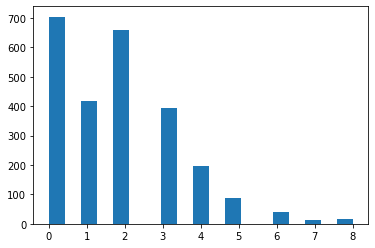

In [73]:
q2_df1 = pd.read_excel('ds_b.xlsx')
_ = plt.hist(q2_df1.CHILDS, bins = "auto")
ismiss = q2_df1.CHILDS.isna()
print(f" Number of missing values = {ismiss.sum()}")
q2_df1 = q2_df1[~ismiss] #移除na

In [74]:
m1 = q2_df1.CHILDS.mean()
std1 = q2_df1.CHILDS.std()
nobs = q2_df1.CHILDS.shape[0]
print(f"Sample mean = {m1:.4f}")
print(f"Sample std dev = {std1:.4f}")
print(f"Sample size = {nobs}")

Sample mean = 1.8209
Sample std dev = 1.6230
Sample size = 2530


In [75]:
# rejection region
alpha = 0.05
m0 = 2.08
tcv = stats.t.ppf(1 - alpha, df = nobs - 1)
rej_cv = m0 - tcv * std1 / (nobs ** 0.5)
print(f"The critical value is {rej_cv:.4f}")

The critical value is 2.0269


In [76]:
stderr = std1 / (nobs ** 0.5)
tvalue = (m1 - m0) / stderr
print(f"The t-value for our hypothesis is {tvalue:.4f}")
pvalue = stats.t.cdf(tvalue, df = nobs - 1)
print(f"The p-value for our hypothesis is {pvalue:.4f}")

The t-value for our hypothesis is -8.0283
The p-value for our hypothesis is 0.0000


Since the p-value < 0.05, we can reject the null hypothesis at a 95% confidence level. Thus we have evidence to support that the TFR is less than 2.08.

In [77]:
tcv2 = stats.t.ppf(1 - alpha/2, df = nobs - 1)
lcl = m1 - tcv2 * stderr
ucl = m1 + tcv2 * stderr #stderr為除以n過的標準差
print(f"95% CI = [{lcl:.4f}, {ucl:.4f}]")

95% CI = [1.7577, 1.8842]


## Question 3
One important factor in inventory control is the variance of the daily demand for the product. A management scientist has developed the optimal order quantity and reorder point, assuming that the variance is equal to 250. The company has recently experienced some inventory problems, which induced the operations manager to doubt the assumption. To examine the problem, the manager took a sample of 25 days and recorded the demand. 
* (10%) A. Do these data provide sufficient evidence at the 5% significant level to infer that the management scientist's assumption about the variance is wrong? You should report the Chi-squared statistics, the Chi-squared test critical value, and the p-value. 
* (3%) B. What is the required condition for the statistical procedure in Part A?
* (3%) C. Does it appear that the required condition is not satisfied?

In [80]:
q3_df1 = pd.read_excel('ds_c.xlsx')
m3 = q3_df1.Demand.mean()
std3 = q3_df1.Demand.std()
nobs3 = q3_df1.Demand.shape[0]
print(f"Sample mean = {m3:.4f}")
print(f"Sample std dev = {std3:.4f}")
print(f"Sample size = {nobs3}")

Sample mean = 201.6000
Sample std dev = 16.4494
Sample size = 25


Hypothesis Testing
We use σ2 to denote the demand variance.
H0: σ2=250
H1: σ2≠250

In [81]:
# Chi-squared statistics
# the Null hypothesis
var0 = 250
alpha = 0.05
chi2_value = (nobs3 - 1) * std3 ** 2 / var0 #n-1乘以樣本標準差平方除以題目給的標準差平方
chi2_lcv = stats.chi2.ppf(alpha / 2 , df = nobs3 - 1)
chi2_ucv = stats.chi2.ppf(1 - alpha / 2, df = nobs3 - 1)
p_value3 = stats.chi2.cdf(chi2_value, df = nobs3 - 1)
if p_value3 > 0.5:
    p_value3 = 1 - p_value3
# two-tailed test
p_value3 = p_value3 * 2

print(f"The Chi-squared Statistic is {chi2_value:.4f}")
print(f"The rejection region is "\
      f"Chi-squared statistics < {chi2_lcv:.4f} or\n     Chi-squared statistics > {chi2_ucv:.4f}")

print(f"The p-value is {p_value3:.4f}")

The Chi-squared Statistic is 25.9760
The rejection region is Chi-squared statistics < 12.4012 or
     Chi-squared statistics > 39.3641
The p-value is 0.7088


Since the p-value = 0.7088 > 0.05, we do not have enough evidence to reject the null hypothesis. That is, we cannot reject the hypothesis that the population variance is 250.

chisquare時 The demand is required to be normally distributed.<br>
_ = plt.hist(q3_df1.Demand, bins = "auto")

## Question 4
(22% data file = ds_d.xlsx) In an attempt to reduce the number of person-hours lost as a result of industrial accidents, a large production plant installed new safety equipment. In a test of the effectiveness of the equipment, a random sample of 50 departments was chosen. The number of person-hours lost in the month before and the month after installing the safety equipment was recorded. The percentage change was calculated and recorded. 

* (5%) A. Can we infer at the 5% significant level that the new safety equipment is effective?
* (6%) B. The manager is concerned that the test was not sensitive enough to detect small but important changes. In particular, he worries that if the true reduction in time lost to accidents is actually 2% (i.e., $\mu = -2$), then the firm may miss the opportunity to install very effective equipment based on z tests. Assume that the population standard deviation of the percentage change is 5.0, find the probability that the test will fail to conclude that such equipment is effective using a sample size of 50. 
* (5%) C. Discuss ways to decrease this probability in the previous question. 
* (6%) D. Plot the probability that the test can successfully conclude that such equipment is effective for $-5 \le \mu < 0$. 

The goal is to test the mean of reduced person-hours lost as a result of industrial accident. Let μ denote the population mean of this random variable. We write our hypotheses as:
H0: μ>=0 H1: μ<0

In [86]:
q4_df1 = pd.read_excel('ds_d.xlsx')
m4 = q4_df1.Change_percent.mean()
std4 = q4_df1.Change_percent.std()
nobs4 = q4_df1.Change_percent.shape[0]
print(f"Sample mean = {m4:.4f}")
print(f"Sample std dev = {std4:.4f}")
print(f"Sample size = {nobs4}")

Sample mean = -1.2000
Sample std dev = 5.0629
Sample size = 50


In [87]:
t_value4 = (m4 - 0) / (std4 / (nobs4 ** 0.5)) #剪掉h0平均數後除以sample標準差/根號sample數
print(f"t-value = {t_value4:.4f}")
p_value4 = stats.t.cdf(t_value4, df = nobs4 - 1)
print(f"The p-value = {p_value4:.4f}")
#The p-value = 0.0501 > 0.05. Thus we cannot reject the null hypothesis. 
#That is, we do not have evidence that the safety equipment is effective at 5% significant level

t-value = -1.6760
The p-value = 0.0501


In [89]:
#if using z-test, with population sigma = 5
alpha4 = .05
zcv = stats.norm.ppf(1 - alpha4)
print(f"The critical value for z-value is {zcv:.4f}")
sigma4 = 5.0 #假設標準差為五的z檢定
nobs4 = 50
xbar_sd = sigma4 / nobs4 ** 0.5
print(f"Std. Dev. of x_bar is {xbar_sd:.4f}")

The critical value for z-value is 1.6449
Std. Dev. of x_bar is 0.7071


In [90]:
mu4_0 = 0
xbar_cv = mu4_0 - zcv * xbar_sd
print(f"The critical value of x_bar is {xbar_cv:.4f}") #找到拒絕的數值xc
#Type II error: β = Prob(xbar>-1.1631|μ =-2 )
mu1 = -2
z_rf1 = (xbar_cv - mu1) / (sigma4 / nobs4 ** 0.5)
print(f"z_rf1 = {z_rf1:.4f}")
beta = 1 - stats.norm.cdf(z_rf1)
print(f"beta = {beta:.4f}")
#β can be decreased by increasing α and/or increasing the sample size.

The critical value of x_bar is -1.1631
z_rf1 = 1.1836
beta = 0.1183


mu = -5.0000, Power = 1.0000
mu = -4.6000, Power = 1.0000
mu = -4.1000, Power = 1.0000
mu = -3.1000, Power = 0.9969
mu = -2.1000, Power = 0.9074
mu = -1.1000, Power = 0.4645
mu = -0.1000, Power = 0.0664


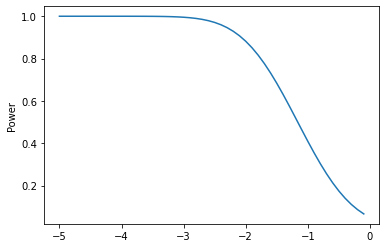

In [93]:
import numpy as np
mu1_all = np.arange(-5, 0, 0.1)
power_all = []
for mu1 in mu1_all:
    z_rf1 = (xbar_cv - mu1) / (sigma4 / nobs4 ** 0.5)
    powertmp = stats.norm.cdf(z_rf1) #實際拒絕他的機率
    power_all.append(powertmp)       #beta為1-此power
_ = plt.plot(mu1_all, power_all)
_ = plt.ylabel("Power")
# show a few values
idx1 = [0, 4, 9, 19, 29, 39, 49]
for i in idx1:
    amu = mu1_all[i]
    pw1 = power_all[i]
    print(f"mu = {amu:.4f}, Power = {pw1:.4f}")

Self-selected samples are samples generated by sending out invitations to the target population and let individuals to determine whether they are going to participate.

Self-selected samples are always biased because only individuals who are more interested in the issues involved in the invitation are motivated to participate.

Examples include (1) the survey conducted on the Internet, (2) survey called by a Radio or TV show.

Sampling error refers to differences between the sample and the population that exists only because of the observations that happended to be selected for the sample. Sampling error is an error that we expect to occur when we make a statement about a population that is based only on the observations contained in a sample taken from the population.

An unbiased estimator of a population parameter is an estimator whose expected value is equal to that parameter.

An estimator is consistent if the difference between the estimator and the parameter grows smaller as the sample size grows larger.